# A Cando Demo
# Explore hydrolysis catalyst design

## Click on this text box and then hit Shift-Enter to evaluate each cell and recreate the calculations set up within this notebook.  

## Some cells take a few seconds to evaluate - wait until output appears before moving on to the next cell.

## The Chemdraw structure for a designed molecule that might present six carboxylic acids to bind and wrap around a Zr-O cluster that could hydrloyze nerve agents.

## It turns out that this is a poor design - but suggests some ideas on how to make a better one.

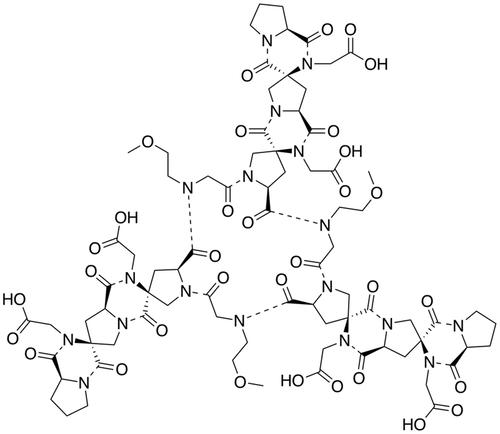

In [2]:
(png-from-file "trimer.png")

## The following is a Zr-O cluster - the hydrolytic heart of NU-1000 (Farha group)

In [4]:
(defparameter *zr* (load-mol2 "renamed-zrcluster.mol2"))

*ZR*

In [5]:
(:= *zr-view* (nglv:show-aggregate *zr*)) *zr-view*

A Jupyter Widget

### Rotate the molecule by dragging the left mouse button (or trackpad) within the view above.

### Zoom (two button drag scroll or scroll wheel).

### Pick atoms (hover over atom and left button click).

### At the bottom right corner of the view above is a very small control, drag that to make the view larger.

### Double click with left button to go full screen, hit Escape to return to browser.

## Load and build 3D coordinates of trimer

In [6]:
(defparameter *agg* (load-chemdraw-aggregate "trimer.cdxml"))

*AGG*

In [7]:
(build-hydrogens *agg*)

NIL

In [8]:
(nglv:show-aggregate *agg*)

A Jupyter Widget

### The structure above is the Chemdraw structure with no depth.  It illustrates that the Chemdraw structure is loaded successfuly into Cando.

In [9]:
(:= *stereocenters* (stereocenters-sorted-by-name *agg*))

*STEREOCENTERS*

In [10]:
(set-all-stereocenters-to *stereocenters* :S :show t)

C_108  S
C_110  S
C_133  S
C_135  S
C_158  S
C_227  S
C_229  S
C_237  S
C_239  S
C_247  S
C_322  S
C_324  S
C_332  S
C_334  S
C_342  S
15 stereocenters set


NIL

In [11]:
(jostle *agg* 20)

NIL

In [12]:
(nglv:show-aggregate *agg*)

A Jupyter Widget

### In the view above, atoms are randomly jostled in space to break them out of "flatland".

## Below we construct a chemically reasonable structure of the molecule by minimizing the conformation energy. 

This does a lot of things in sequence:

1) Cando automatically assigns atom types.

2) Cando assigns Generalized Amber Force Field (GAFF) parameters.

3) Cando minimizes the energy of the structure, automatically switching between three energy minimizers to take advantage of their different speed/convergence characteristics.

In [13]:
(energy:setup-amber)

SIMPLE-WARNING: 
Warning!  Skipping 10-12 hbond
SIMPLE-WARNING: 
Warning!  Skipping force field atom equivalences


#<FORCE-FIELD >

#### You can ignore the warnings above.

In [14]:
(energy:minimize *agg* :force-field energy::*ff* 
                 :restraints-on t
                 :max-sd-steps 1000
                 :sd-tolerance 5000.0
                 :max-cg-steps 1000)

======= Starting Steepest Descent Minimizer
---Stage-Seconds--Step-----Alpha---Dir-------------Energy-----------RMSforce
 minSDnP       0     1  0.000000   0.0              0.000          13466.230
 minSDnP       0     2  0.000276   0.0       13861052.892           8817.366
 minSDnP       0     3  0.000140   0.0       11087712.382           5240.174
 minSDnP       0     4  0.000227   0.0        9270576.584           5366.253
DONE absolute force test:
forceRmsMag(3690.395953).LT.forceTolerance(5000.000000)
======= Starting Conjugate Gradient Minimizer
 minCGnP       0     5  0.000000   0.0              0.000           3690.396
 minCGnP       0     6  0.000167  42.2        7852860.384           3345.972
 minCGnP       0     7  0.000329  63.9        6925696.659           5466.203
 minCGnP       0     8  0.000059  49.4        6638627.232           3904.274
 minCGnP       0     9  0.000130  55.1        6262236.052           4041.508
 minCGnP       0    10  0.000113  47.2        5895090.656 

NIL

### Check that the stereochemistry is maintained - they will all still be 'S' configuration.

In [15]:
(calculate-all-stereochemistry *stereocenters*)

Center: #<ATOM :C_108/:C>  config: S
Center: #<ATOM :C_110/:C>  config: S
Center: #<ATOM :C_133/:C>  config: S
Center: #<ATOM :C_135/:C>  config: S
Center: #<ATOM :C_158/:C>  config: S
Center: #<ATOM :C_227/:C>  config: S
Center: #<ATOM :C_229/:C>  config: S
Center: #<ATOM :C_237/:C>  config: S
Center: #<ATOM :C_239/:C>  config: S
Center: #<ATOM :C_247/:C>  config: S
Center: #<ATOM :C_322/:C>  config: S
Center: #<ATOM :C_324/:C>  config: S
Center: #<ATOM :C_332/:C>  config: S
Center: #<ATOM :C_334/:C>  config: S
Center: #<ATOM :C_342/:C>  config: S


NIL

In [16]:
(nglv:show-aggregate *agg*)

A Jupyter Widget

## Above should be a chemically reasonable three-dimensional structure of the molecule.

In [17]:
(center-on *agg* '(0.0 0.0 15.0))

NIL

In [18]:
(:= *design-view* (nglv::show-aggregate *zr*))
(:= *cagg* (make-instance 'nglv::cando-structure :matter *agg*))
(nglv::add-structure *design-view* *cagg*)
*design-view*

A Jupyter Widget

## You can select pairs of carboxylic acid carbons on the ligand and on the benzoic acids of the Zr-O cluster multiple times to build a mapping of atoms on the ligand to the cluster.  It's a bit tricky and takes a couple of tries to get it right.  The function below pulls out the mapping.

In [19]:
(:= *named-map* (named-atom-map *design-view* 6 *agg* *zr*))

SIMPLE-ERROR: 
There aren't enough atoms selected to create a map for 6 pairs.


NIL

#### If you didn't select atoms in the view above then you will have just seen an error - don't worry about it. 
#### I set the *named-map* variable below using a selection I made previously.

In [20]:
(:= *named-map* '((:C_350 . :C_2) (:C_354 . :C_1) 
                  (:C_255 . :C_7) (:C_259 . :C_8)
                  (:C_185 . :C_3) (:C_196 . :C_4)))

*NAMED-MAP*

In [21]:
(cartoon-atom-map *design-view* *named-map* *agg* *zr*)

NIL

## Scroll up and you should see magenta lines joining the pairs of atoms that are mapped on to each other.

### Next we are going to constrain the selected atoms from the trial catalyst to the Zr-O crystal structure.

In [22]:
(clear-all-atom-restraints *agg*)

NIL

In [23]:
(anchor-named-atom-map *named-map* *agg* *zr*)

NIL

In [24]:
(set-all-stereocenters-to *stereocenters* :S :show t)

C_108  S
C_110  S
C_133  S
C_135  S
C_158  S
C_227  S
C_229  S
C_237  S
C_239  S
C_247  S
C_322  S
C_324  S
C_332  S
C_334  S
C_342  S
15 stereocenters set


NIL

In [25]:
(energy:minimize *agg* :force-field energy::*ff* :restraints-on t
                 :max-sd-steps 1000
                 :sd-tolerance 5000.0
                 :max-cg-steps 1000)

======= Starting Steepest Descent Minimizer
DONE absolute force test:
forceRmsMag(29.582596).LT.forceTolerance(5000.000000)
======= Starting Conjugate Gradient Minimizer
---Stage-Seconds--Step-----Alpha---Dir-------------Energy-----------RMSforce
 minCGnP       0     1  0.000000   0.0              0.000             29.583
 minCGnP       0     2  0.000566  39.9          14779.232             24.697
 minCGnP       0     3  0.001808  53.4          14365.620             28.930
 minCGnP       0     4  0.000980  59.6          14095.573             29.330
 minCGnP       0     5  0.001121  63.7          13753.153             31.916
 minCGnP       0     6  0.000666  77.9          13441.185             75.272
 minCGnP       0     7  0.000044  74.0          13365.623             71.756
 minCGnP       0     8  0.000229  58.6          13129.913             42.616
 minCGnP       0     9  0.000797  59.4          12631.336             33.487
 minCGnP       0    10  0.001033  62.8          12225.878   

SIMPLE-WARNING: 
The minimizer reported: #<CHEM:MINIMIZER-EXCEEDED-MAX-STEPS-ERROR>


NIL

In [26]:
(nglv:show-aggregate *agg*)

A Jupyter Widget

### It turns out that the structure above is a bad design - with lots of bad geometry.
# We can rule this design out and move on to another design with a larger macrocycle to better envelop the Zr-O cluster.

### Overlay of the trial above on the Zr-O cluster and looking at it closely can help us learn what is wrong with the design.

In [26]:
(:= *overlay-view* (nglv::show-aggregate *zr*))
(:= *cagg* (make-instance 'nglv::cando-structure :matter *agg*))
(nglv::clear-representations *overlay-view*)
(nglv::add-representation *overlay-view* "hyperball")
(nglv::add-structure *overlay-view* *cagg*)
*overlay-view*

A Jupyter Widget

## That's it for now - anything more sophisticated requires setting up more designs and running more sophisticated calculations on super-computers.
## This user interface can drive 100,000s of copies of Cando running on large super-computers.

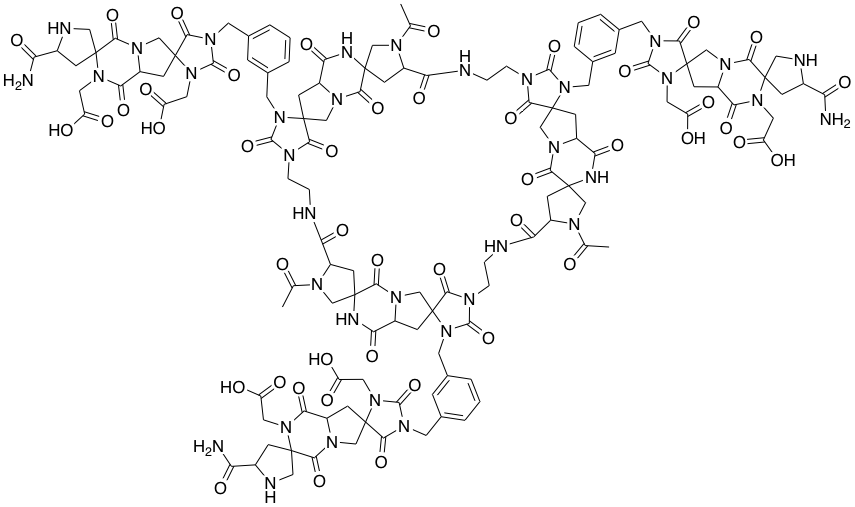

In [30]:
(png-from-file "trial-catalyst2 copy.png")

In [31]:
(:= *agg2* (load-chemdraw-aggregate "trial-catalyst2.cdxml"))

*AGG2*

In [32]:
(build-hydrogens *agg2*)

NIL

In [33]:
(nglv:show-aggregate *agg2*)

A Jupyter Widget

### The structure above is the Chemdraw structure with no depth.  It illustrates that the Chemdraw structure is loaded successfuly into Cando.

In [36]:
(:= *stereocenters2* (stereocenters-sorted-by-name *agg2*))

*STEREOCENTERS2*

In [37]:
(set-all-stereocenters-to *stereocenters2* :S :show t)

C_136  S
C_153  S
C_174  S
C_185  S
C_2    S
C_250  S
C_253  S
C_257  S
C_261  S
C_287  S
C_293  S
C_298  S
C_301  S
C_36   S
C_397  S
C_400  S
C_404  S
C_408  S
C_434  S
C_440  S
C_445  S
C_448  S
C_50   S
C_8    S
24 stereocenters set


NIL

In [38]:
(jostle *agg2* 20)

NIL

In [39]:
(nglv:show-aggregate *agg2*)

A Jupyter Widget

### In the view above, atoms are randomly jostled in space to break them out of "flatland".

## Below we construct a chemically reasonable structure of the molecule by minimizing the conformation energy. 

This does a lot of things in sequence:

1) Cando automatically assigns atom types.

2) Cando assigns Generalized Amber Force Field (GAFF) parameters.

3) Cando minimizes the energy of the structure, automatically switching between three energy minimizers to take advantage of their different speed/convergence characteristics.

#### You can ignore the warnings above.

In [40]:
(energy:minimize *agg2* :force-field energy::*ff* 
                 :restraints-on t
                 :max-sd-steps 1000
                 :sd-tolerance 5000.0
                 :max-cg-steps 1000)

======= Starting Steepest Descent Minimizer
---Stage-Seconds--Step-----Alpha---Dir-------------Energy-----------RMSforce
 minSDnP       0     1  0.000000   0.0              0.000          14663.038
 minSDnP       0     2  0.000256   0.0       21359453.055          10543.685
 minSDnP       0     3  0.000109   0.0       17700423.451           6402.238
 minSDnP       0     4  0.000223   0.0       14390343.853           5790.080
DONE absolute force test:
forceRmsMag(3654.269212).LT.forceTolerance(5000.000000)
======= Starting Conjugate Gradient Minimizer
 minCGnP       0     5  0.000000   0.0              0.000           3654.269
 minCGnP       0     6  0.000224  50.3       11327774.390           4396.075
 minCGnP       0     7  0.000154  64.4       10307209.120           6618.457
 minCGnP       0     8  0.000037  29.5        9758294.556           3446.750
 minCGnP       0     9  0.000222  56.8        8588051.100           4600.465
 minCGnP       0    10  0.000069  28.8        8116186.228 

SIMPLE-WARNING: 
Estimated angle term :c2-:c3-:n  T0 -> 111.760000 degrees K -> 24.451740 kCal/rad^2
SIMPLE-WARNING: 
Estimated angle term :n-:c3-:c2  T0 -> 111.760000 degrees K -> 24.451740 kCal/rad^2
SIMPLE-WARNING: 
Estimated angle term :n-:c3-:c2  T0 -> 111.760000 degrees K -> 24.451740 kCal/rad^2
SIMPLE-WARNING: 
Estimated angle term :n-:c3-:c2  T0 -> 111.760000 degrees K -> 24.451740 kCal/rad^2
SIMPLE-WARNING: 
Estimated angle term :c2-:c3-:n  T0 -> 111.760000 degrees K -> 24.451740 kCal/rad^2
SIMPLE-WARNING: 
Estimated angle term :c2-:c3-:n  T0 -> 111.760000 degrees K -> 24.451740 kCal/rad^2
SIMPLE-WARNING: 
The minimizer reported: #<CHEM:MINIMIZER-EXCEEDED-MAX-STEPS-ERROR>


NIL

### Check that the stereochemistry is maintained - they will all still be 'S' configuration.

In [41]:
(calculate-all-stereochemistry *stereocenters2*)

Center: #<ATOM :C_136/:C>  config: S
Center: #<ATOM :C_153/:C>  config: S
Center: #<ATOM :C_174/:C>  config: S
Center: #<ATOM :C_185/:C>  config: S
Center: #<ATOM :C_2/:C>  config: S
Center: #<ATOM :C_250/:C>  config: S
Center: #<ATOM :C_253/:C>  config: S
Center: #<ATOM :C_257/:C>  config: S
Center: #<ATOM :C_261/:C>  config: S
Center: #<ATOM :C_287/:C>  config: S
Center: #<ATOM :C_293/:C>  config: S
Center: #<ATOM :C_298/:C>  config: S
Center: #<ATOM :C_301/:C>  config: S
Center: #<ATOM :C_36/:C>  config: S
Center: #<ATOM :C_397/:C>  config: S
Center: #<ATOM :C_400/:C>  config: S
Center: #<ATOM :C_404/:C>  config: S
Center: #<ATOM :C_408/:C>  config: S
Center: #<ATOM :C_434/:C>  config: S
Center: #<ATOM :C_440/:C>  config: S
Center: #<ATOM :C_445/:C>  config: S
Center: #<ATOM :C_448/:C>  config: S
Center: #<ATOM :C_50/:C>  config: S
Center: #<ATOM :C_8/:C>  config: S


NIL

In [42]:
(nglv:show-aggregate *agg2*)

A Jupyter Widget

In [45]:
(center-on *agg2* '(0.0 0.0 15.0))

NIL

In [46]:
(:= *design-view2* (nglv::show-aggregate *zr*))
(:= *cagg2* (make-instance 'nglv::cando-structure :matter *agg2*))
(nglv::add-structure *design-view2* *cagg2*)
*design-view2*

A Jupyter Widget

## You can select pairs of carboxylic acid carbons on the ligand and on the benzoic acids of the Zr-O cluster multiple times to build a mapping of atoms on the ligand to the cluster.  It's a bit tricky and takes a couple of tries to get it right.  The function below pulls out the mapping.

In [52]:
(:= *named-map2* (named-atom-map *design-view2* 6 *agg2* *zr*))

*NAMED-MAP2*

In [53]:
*named-map2*

((:C_452 . :C_8) (:C_458 . :C_7) (:C_198 . :C_5) (:C_219 . :C_6)
 (:C_305 . :C_4) (:C_311 . :C_3))

#### If you didn't select atoms in the view above then you will have just seen an error - don't worry about it. 
#### I set the *named-map* variable below using a selection I made previously.

In [54]:
(:= *named-map2* '((:C_452 . :C_8) (:C_458 . :C_7) 
                    (:C_198 . :C_5) (:C_219 . :C_6)
                    (:C_305 . :C_4) (:C_311 . :C_3)))

*NAMED-MAP2*

In [56]:
(cartoon-atom-map *design-view2* *named-map2* *agg2* *zr*)

NIL

## Scroll up and you should see magenta lines joining the pairs of atoms that are mapped on to each other.

### Next we are going to constrain the selected atoms from the trial catalyst to the Zr-O crystal structure.

In [57]:
(clear-all-atom-restraints *agg2*)

NIL

In [58]:
(anchor-named-atom-map *named-map2* *agg2* *zr*)

NIL

In [59]:
(set-all-stereocenters-to *stereocenters2* :S :show t)

C_136  S
C_153  S
C_174  S
C_185  S
C_2    S
C_250  S
C_253  S
C_257  S
C_261  S
C_287  S
C_293  S
C_298  S
C_301  S
C_36   S
C_397  S
C_400  S
C_404  S
C_408  S
C_434  S
C_440  S
C_445  S
C_448  S
C_50   S
C_8    S
24 stereocenters set


NIL

In [60]:
(energy:minimize *agg2* :force-field energy::*ff* :restraints-on t
                 :max-sd-steps 1000
                 :sd-tolerance 5000.0
                 :max-cg-steps 1000)

======= Starting Steepest Descent Minimizer
DONE absolute force test:
forceRmsMag(35.308644).LT.forceTolerance(5000.000000)
======= Starting Conjugate Gradient Minimizer
---Stage-Seconds--Step-----Alpha---Dir-------------Energy-----------RMSforce
 minCGnP       0     1  0.000000   0.0              0.000             35.309
 minCGnP       0     2  0.000890  47.3          31836.952             38.243
 minCGnP       0     3  0.000655  38.2          31277.305             35.053
 minCGnP       0     4  0.000737  46.4          30813.470             28.273
 minCGnP       0     5  0.001188  60.7          30332.991             35.589
 minCGnP       0     6  0.001577  73.3          29279.977             52.557
 minCGnP       0     7  0.000680  60.5          28224.837             57.051
 minCGnP       0     8  0.000701  69.6          27026.693             77.953
 minCGnP       0     9  0.000210  44.6          26734.511             54.295
 minCGnP       0    10  0.000649  43.5          25746.915   

SIMPLE-WARNING: 
Estimated angle term :c2-:c3-:n  T0 -> 111.760000 degrees K -> 24.451740 kCal/rad^2
SIMPLE-WARNING: 
Estimated angle term :n-:c3-:c2  T0 -> 111.760000 degrees K -> 24.451740 kCal/rad^2
SIMPLE-WARNING: 
Estimated angle term :n-:c3-:c2  T0 -> 111.760000 degrees K -> 24.451740 kCal/rad^2
SIMPLE-WARNING: 
Estimated angle term :n-:c3-:c2  T0 -> 111.760000 degrees K -> 24.451740 kCal/rad^2
SIMPLE-WARNING: 
Estimated angle term :c2-:c3-:n  T0 -> 111.760000 degrees K -> 24.451740 kCal/rad^2
SIMPLE-WARNING: 
Estimated angle term :c2-:c3-:n  T0 -> 111.760000 degrees K -> 24.451740 kCal/rad^2


NIL

In [61]:
(nglv:show-aggregate *agg2*)

A Jupyter Widget

### This may be a better design.
### It's going to take more work to establish this.
### A build-tree will be constructed and ligands will be restrained to mimic the benzoic acids from the Zr-O cluster.
### 1) Rotatable bonds will be twisted.
### 2) Stereocenters will be flipped.
### 3) Functional groups will be varied.
### While scoring the conformational energy to find an optimal design.